In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()



In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# PART 1: Exploratory Data Analysis

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# of all passenges in df_train, How many survived, how many died?

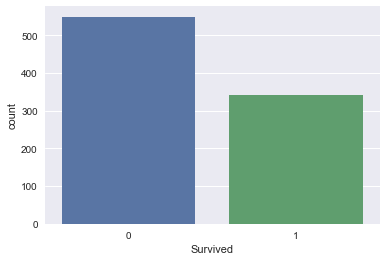

In [10]:
sns.countplot(x="Survived", data = df_train)

In [11]:
print(df_train.Survived.sum()/df_train.Survived.count())

0.3838383838383838


In [12]:
#df_test['Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('no_survivors.csv', index = False)

# Sex: Female more likely to survive than male


In [13]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

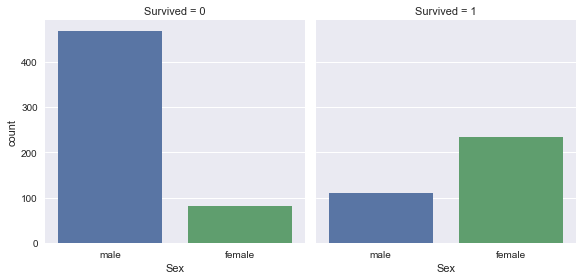

In [14]:
sns.factorplot(x = 'Sex', col='Survived', kind ='count', data=df_train)

In [15]:
print('% of women survived: ', df_train[df_train.Sex=='female'].Survived.sum()/df_train[df_train.Sex=='female'].Survived.count())
print('% of men survived: ', df_train[df_train.Sex=='male'].Survived.sum()/df_train[df_train.Sex=='male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:  0.18890814558058924


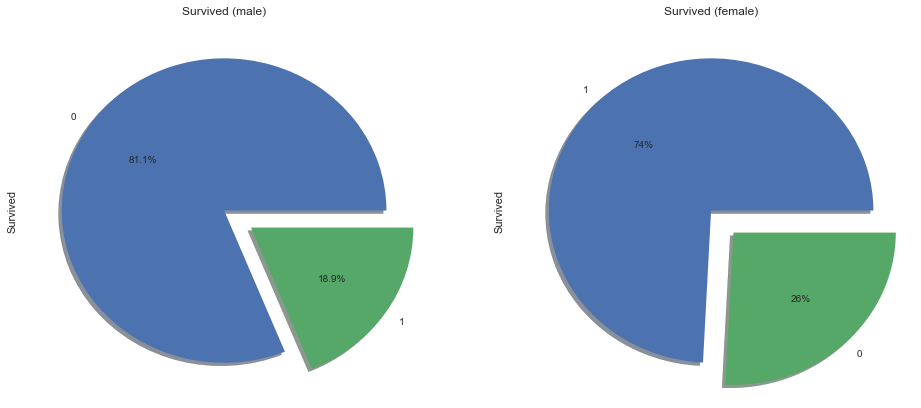

In [16]:
f,ax = plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex'] =='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%', ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex'] =='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.f%%', ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

### Women wer more likely to survive than men
### 74% of women survived but only 19% of men (in training set)
### second model: all women survived and all men died
### submission : 0.766 accuracy

In [17]:
# passenger Class: Survival rate decreases with Pclass

pd.crosstab(df_train.Pclass, df_train.Survived,margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [18]:
print('% of survivals in')
print('Pclass=1 : ', df_train.Survived[df_train.Pclass==1].sum()/df_train[df_train.Pclass==1].Survived.count())
print('Pclass=2 : ', df_train.Survived[df_train.Pclass==2].sum()/df_train[df_train.Pclass==2].Survived.count())
print('Pclass=3 : ', df_train.Survived[df_train.Pclass==3].sum()/df_train[df_train.Pclass==3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


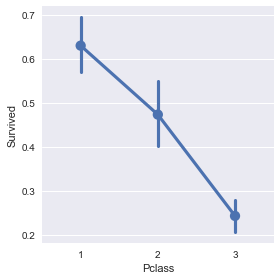

In [19]:
sns.factorplot('Pclass', 'Survived', kind='point', data=df_train)

#### passenger Class and Sex:
#### Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

In [20]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

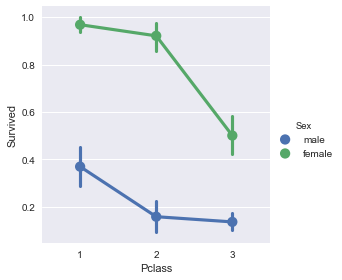

In [21]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', kind = 'point', data = df_train)

##### Embarked: Survival rate lowest fo S and highest for C


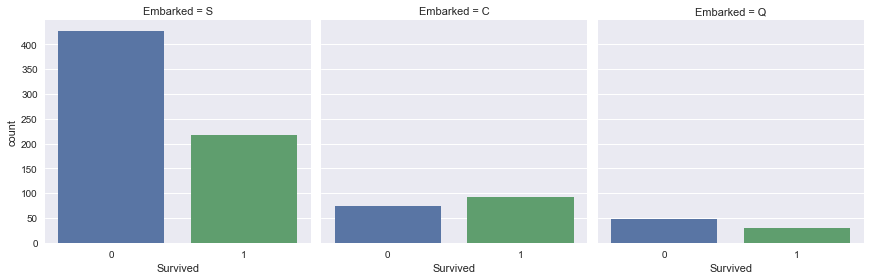

In [22]:
sns.factorplot(x='Survived', col='Embarked', kind='count',data=df_train)

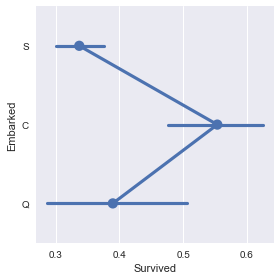

In [23]:
sns.factorplot('Survived','Embarked',kind='point',data=df_train)

##### Embarked an Sex

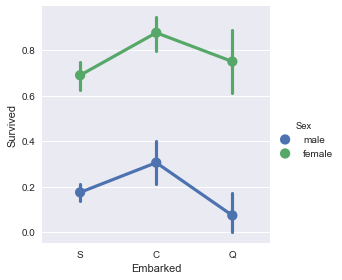

In [24]:
sns.factorplot('Embarked','Survived', hue = 'Sex', kind = 'point', data=df_train)
plt.show()

##### Embarked, Pclass, and Sex:
##### Practically all women of Pclass 2 tha tembarked in C and Q survived, also nearly all women of Pclass 1 survived.
##### All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2
##### For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx 0.4
  

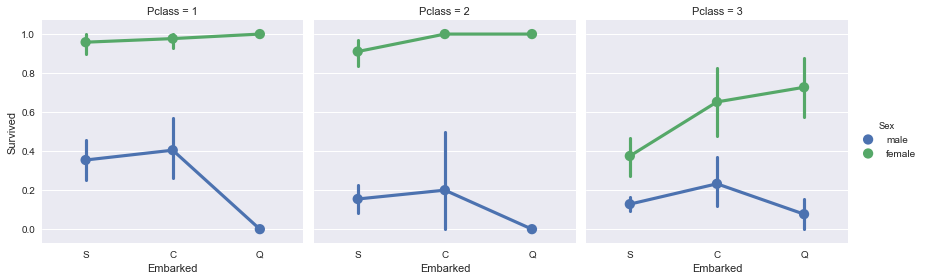

In [25]:
sns.factorplot('Embarked',"Survived",col = "Pclass",hue = 'Sex', kind = 'point' , data = df_train)

In [26]:
pd.crosstab([df_train.Survived],[df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [27]:
# model 3
df_test['Survived'] = 0
# all women survived
df_test.loc[ (df_test.Sex == 'female'), 'Survived'] = 1
# except for those in Pclass 3 and embarked in S
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Embarked == 'S') , 'Survived'] = 0
#df_test[['PassengerId', 'Survived']].to_csv('embarked_pclass_sex.csv', index=False)

In [28]:
df = pd.read_csv('embarked_pclass_sex.csv')

In [29]:
df.Survived.sum()/df.Survived.count()

0.26555023923444976

#### Age: continunous numerical to 8 bins


In [30]:
for df in [df_train,df_test]:
    df['Age_bin'] = np.nan
    for i in range(8,0,-1):
        df.loc[df['Age'] <= i*10, 'Age_bin'] = i

In [31]:
print(df_train[['Age', 'Age_bin']].head())

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0


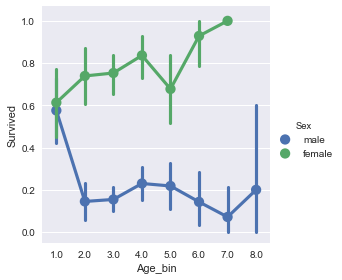

In [32]:
sns.factorplot('Age_bin','Survived', hue='Sex', kind='point', data=df_train)
plt.show()

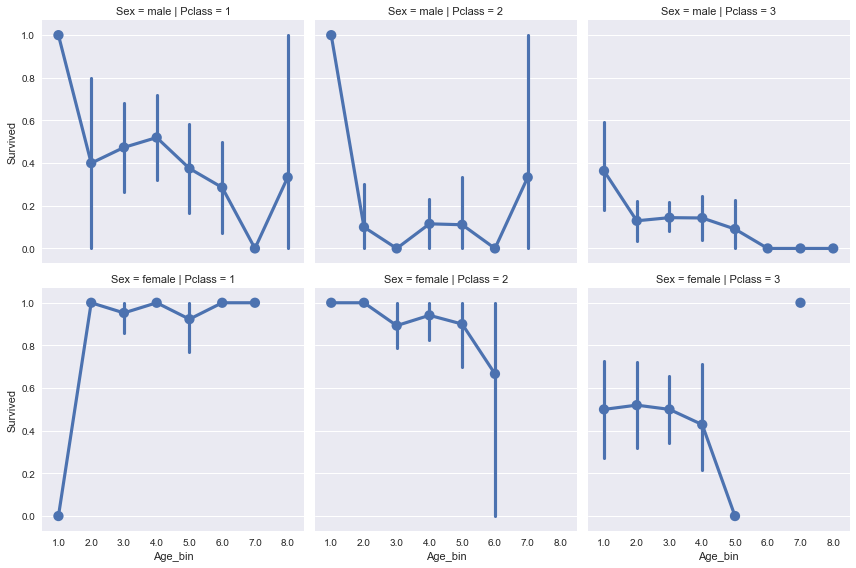

In [33]:
sns.factorplot('Age_bin','Survived',col='Pclass', row = 'Sex', kind = 'point', data = df_train)

In [34]:
pd.crosstab([df_train.Sex,df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins = True).style.background_gradient(cmap='autumn_r')

In [35]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

In [36]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins= True).style.background_gradient(cmap='autumn_r')

In [37]:
# all females with SibSb>7 died
df_test.loc[(df_test.Sex=='female')&(df_test.SibSp>7),'Survived']=0

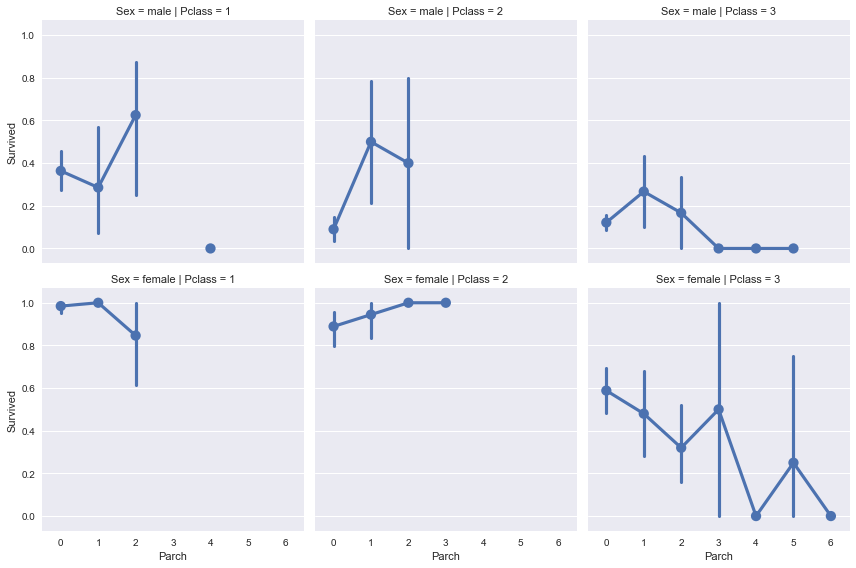

In [38]:
sns.factorplot('Parch', 'Survived', col='Pclass', row='Sex', kind='point', data = df_train)
plt.show()

In [39]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins= True).style.background_gradient(cmap='autumn_r')

In [40]:
#survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

df_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,4.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,7.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,2.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,3.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,3.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,2.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,3.0


#### Fare: continuos numerical t 12 bins


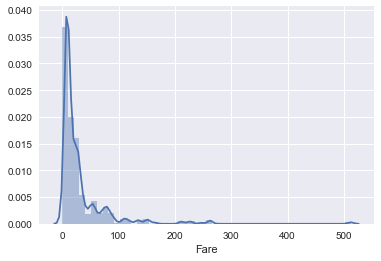

In [41]:
sns.distplot(df_train['Fare'])
plt.show()

In [42]:
for df in [df_train,df_test]:
    df['Fare_bin'] = np.nan
    for i in range(12,0,-1):
        df.loc[df['Fare']<=i*50, 'Fare_bin'] = i

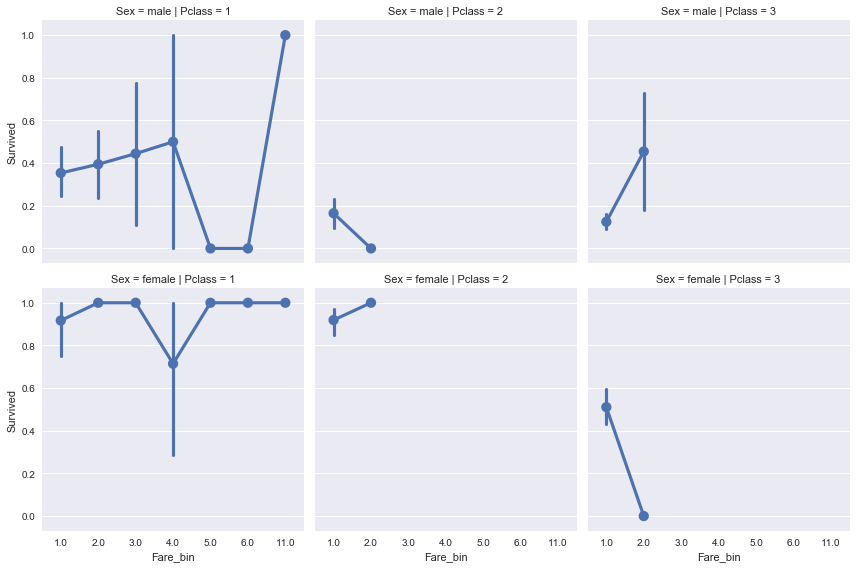

In [43]:
sns.factorplot('Fare_bin','Survived', col = 'Pclass', row ='Sex', kind = 'point', data= df_train)
plt.show()

In [44]:
pd.crosstab([df_train.Sex,df_train.Survived],[df_train.Fare_bin,df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [45]:
# males in Fare_bin = 11 survived
df_test.loc[(df_test.Sex=='male')&(df_test.Fare_bin)==11, 'Survived']=1

### Part 2: Data wrangling
1. building two new dataframes df_train_ml and df_test_ml
2. these will have only ordinal features and no missing values so they can used for ML algorithms
3. converting categorical to numerical by pd.get_dummies
4. dropping all features that seem to be not useful for prediction
5. Then use the Standard scaler and apply train/test split




In [46]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()
df_test_ml = df_test_ml.drop('Survived',axis=1)

In [47]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [48]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml,columns=['Sex','Embarked','Pclass'],drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [49]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [50]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [51]:
df_test_ml.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [52]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


###### Correlation Matrix

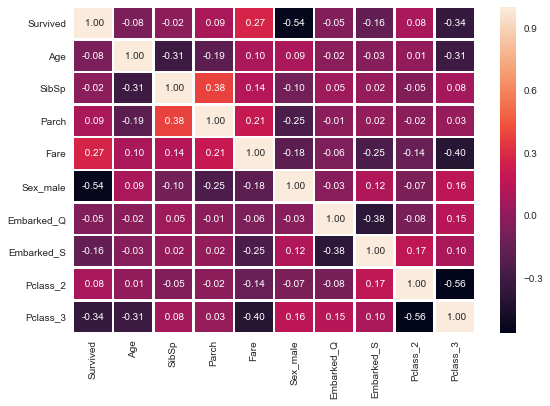

In [53]:
corr = df_train_ml.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot= True, linewidths=1.5, fmt = ' .2f',ax=ax)
plt.show()

Survived and Fare positive correlated, Survived and Sex_male negatively correlated.


Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

### Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

In [64]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

#scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

#### fillna: fill nan with mean values for that column

In [65]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print('*')

*


##### Part 3: Scikit-learn basic ML algorithms an dcomparison of model results


Test simple sklearn models and compared by metrics

We test the following classifiers from scikit-learn

Logistic regression

Gaussian Naive Bayers 

Knearest neighbors KNN

Decision tree classifier

Random forest classifier

SVM classifier

##### For comparision of the results we use these metrics:

acccuracy_score, classification_report, confusion_matrix

##### First we apply the data from test/train split to get a first overview of the model performance. Later we use the k fold cross validation which gives a better estimate for out of sample data

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Logistic Regerssion

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test,pred_logreg))
print(accuracy_score(y_test, pred_logreg))


[[107  16]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       123
           1       0.79      0.65      0.71        92

   micro avg       0.78      0.78      0.78       215
   macro avg       0.78      0.76      0.77       215
weighted avg       0.78      0.78      0.77       215

0.7767441860465116


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
logreg.fit(X_train_all,y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
sub_logreg = pd.DataFrame()

In [72]:
sub_logreg['PassengerId'] = df_test['PassengerId']
sub_logreg['Survived'] = pred_all_logreg
# sub_logmodel.to_csv('logmodel.csv, index=False)

Gaussian Naive Bayes


In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)

print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test,pred_gnb))
print(accuracy_score(y_test,pred_gnb))

[[107  16]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       123
           1       0.78      0.61      0.68        92

   micro avg       0.76      0.76      0.76       215
   macro avg       0.76      0.74      0.74       215
weighted avg       0.76      0.76      0.75       215

0.7581395348837209


#### KNN-KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [75]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))

[[71 52]
 [26 66]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       123
           1       0.56      0.72      0.63        92

   micro avg       0.64      0.64      0.64       215
   macro avg       0.65      0.65      0.64       215
weighted avg       0.66      0.64      0.64       215

0.6372093023255814


In [76]:
knn.fit(X_train_all,y_train_all)
pred_all_knn = knn.predict(X_test)
print(confusion_matrix(y_test,pred_all_knn))
print(classification_report(y_test,pred_all_knn))
print(accuracy_score(y_test,pred_all_knn))

[[102  21]
 [ 50  42]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       123
           1       0.67      0.46      0.54        92

   micro avg       0.67      0.67      0.67       215
   macro avg       0.67      0.64      0.64       215
weighted avg       0.67      0.67      0.66       215

0.6697674418604651


##### Decision Tree Classifer



In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test,pred_all_knn))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       123
           1       0.72      0.63      0.67        92

   micro avg       0.74      0.74      0.74       215
   macro avg       0.74      0.73      0.73       215
weighted avg       0.74      0.74      0.74       215

0.6697674418604651


In [81]:
dtree_2 = DecisionTreeClassifier(max_features=7, max_depth=6, min_samples_split=8)
dtree_2.fit(X_train, y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test,pred_dtree_2))
print(accuracy_score(y_test,pred_dtree_2))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       123
           1       0.81      0.59      0.68        92

   micro avg       0.76      0.76      0.76       215
   macro avg       0.77      0.74      0.75       215
weighted avg       0.77      0.76      0.76       215

0.7627906976744186


In [83]:
dtree_2.fit(X_train_all, y_train_all)
pred_all_dtree2 = dtree_2.predict(X_test)

In [84]:
print(accuracy_score(y_test,pred_all_dtree2))

0.8232558139534883


###### Random Forest Classifier


In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6,max_features=7)
rfc.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))
print(accuracy_score(y_test,pred_rfc))

[[114   9]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       123
           1       0.86      0.61      0.71        92

   micro avg       0.79      0.79      0.79       215
   macro avg       0.81      0.77      0.77       215
weighted avg       0.80      0.79      0.78       215

0.7906976744186046


In [89]:
rfc.fit(X_train_all,y_train_all)
pred_all_rfc = rfc.predict(X_test)

In [90]:
print(confusion_matrix(y_test,pred_all_rfc))
print(classification_report(y_test,pred_all_rfc))
print(accuracy_score(y_test,pred_all_rfc))

[[120   3]
 [ 20  72]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       123
           1       0.96      0.78      0.86        92

   micro avg       0.89      0.89      0.89       215
   macro avg       0.91      0.88      0.89       215
weighted avg       0.90      0.89      0.89       215

0.8930232558139535


### SVM

In [91]:
from sklearn.svm import SVC
svc = SVC(gamma=0.01,C=100)# probability= True
svc.fit(X_train_sc,y_train_sc)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))
print(accuracy_score(y_test,pred_svc))

[[116   7]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.63      0.74        92

   micro avg       0.81      0.81      0.81       215
   macro avg       0.83      0.79      0.79       215
weighted avg       0.82      0.81      0.80       215

0.8093023255813954


In [96]:
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

#### k forld cross_validation
This algorithm splits the data into k sets and then makes k fits using every set k-1 times as training and one time as test data
 
It leads to a better estimate for out of sample data than simple train test split

for SVM classifier

In [113]:
from sklearn.model_selection import cross_val_score



In [115]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc,
                           cv=10,scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


In [116]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc,
                           cv=10,scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.75       0.76388889 0.75       0.88888889 0.81690141 0.81690141
 0.85915493 0.76056338 0.85915493 0.85915493]
0.8124608763693271


In [117]:
scores_dtree_2 = cross_val_score(dtree_2, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_dtree_2)
print(scores_dtree_2.mean())

[0.75       0.79166667 0.76388889 0.80555556 0.8028169  0.81690141
 0.81690141 0.8028169  0.8028169  0.83098592]
0.798435054773083


In [118]:
print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

dtree_2 :  0.798435054773083
rfc     :  0.8124608763693271
svc     :  0.8151212832550861
